# **CSE343: *Machine Learning Assignment-2***

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

## **Section B (Library Implementation)**

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
heart_disease = fetch_ucirepo(id=45)

df = pd.DataFrame(heart_disease.data.features)
df["target"] = heart_disease.data.targets
df["target"] = (df["target"] > 0).astype(int)
df.dropna(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


### **Exploratory Data Analysis**

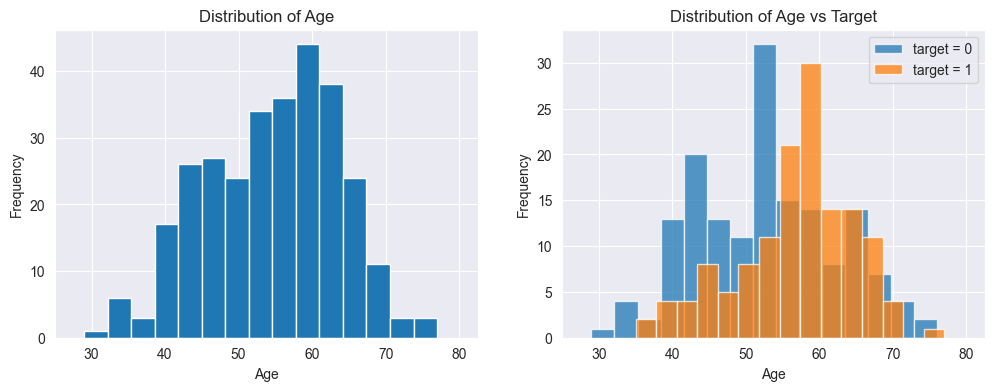

In [48]:
# Distribution of Age

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df["age"], bins=15)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(25, 82.5)

plt.subplot(1, 2, 2)
plt.hist(df[df["target"] == 0]["age"], bins=15, alpha=0.75, label="target = 0")
plt.hist(df[df["target"] == 1]["age"], bins=15, alpha=0.75, label="target = 1")

plt.title("Distribution of Age vs Target")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(25, 82.5)

plt.legend()
plt.show()

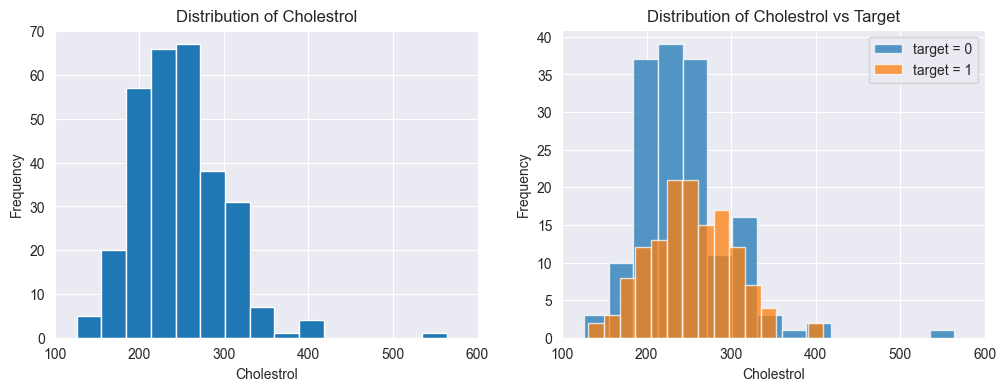

In [47]:
# Distribution of Cholestrol

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df["chol"], bins=15)
plt.title("Distribution of Cholestrol")
plt.xlabel("Cholestrol")
plt.ylabel("Frequency")
plt.xlim(100, 600)

plt.subplot(1, 2, 2)
plt.hist(df[df["target"] == 0]["chol"], bins=15, alpha=0.75, label="target = 0")
plt.hist(df[df["target"] == 1]["chol"], bins=15, alpha=0.75, label="target = 1")

plt.title("Distribution of Cholestrol vs Target")
plt.xlabel("Cholestrol")
plt.ylabel("Frequency")
plt.xlim(100, 600)

plt.legend()
plt.show()

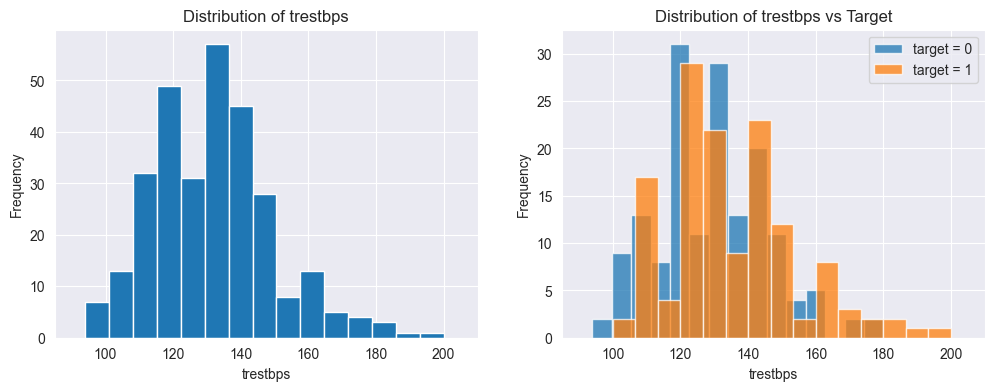

In [46]:
# Distribution of trestbps

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df["trestbps"], bins=15)
plt.title("Distribution of trestbps")
plt.xlabel("trestbps")
plt.ylabel("Frequency")
plt.xlim(85, 210)

plt.subplot(1, 2, 2)
plt.hist(df[df["target"] == 0]["trestbps"], bins=15, alpha=0.75, label="target = 0")
plt.hist(df[df["target"] == 1]["trestbps"], bins=15, alpha=0.75, label="target = 1")

plt.title("Distribution of trestbps vs Target")
plt.xlabel("trestbps")
plt.ylabel("Frequency")
plt.xlim(85, 210)

plt.legend()
plt.show()

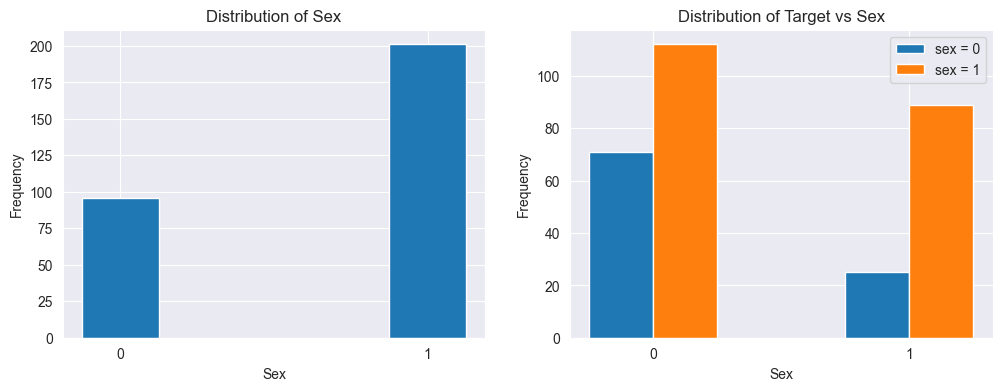

In [45]:
# Distribution of Sex

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(df["sex"].unique(), df["sex"].value_counts(), width=0.25)
plt.title("Distribution of Sex")
plt.xticks([0, 1])
plt.xlabel("Sex")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.bar(df[df["sex"] == 0]["target"].unique()-0.125, df[df["sex"] == 0]["target"].value_counts(), width=0.25, label="sex = 0")
plt.bar(df[df["sex"] == 1]["target"].unique()+0.125, df[df["sex"] == 1]["target"].value_counts(), width=0.25, label="sex = 1")
plt.title("Distribution of Target vs Sex")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.xticks([0, 1])

plt.legend()
plt.show()

### **Train-Test Split**

We split the dataset into a $80:20$ ratio of train to test.

In [8]:
Y = df["target"]
X = df.drop("target", axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### **Training the Model**

In this section, we train our D-Tree models using "entropy" and "gini impurity" as the splitting criterion.

In [9]:
dtc_entropy = DTC(criterion="entropy", random_state=3)
dtc_entropy.fit(x_train, y_train)

dtc_gini = DTC(criterion="gini", random_state=3)
dtc_gini.fit(x_train, y_train)

y_pred_entropy = dtc_entropy.predict(x_test)
y_pred_gini = dtc_gini.predict(x_test)

print("Accuracy Score (Entropy):", accuracy_score(y_test, y_pred_entropy))
print("Accuracy Score (Gini):", accuracy_score(y_test, y_pred_gini))

Accuracy Score (Entropy): 0.7666666666666667
Accuracy Score (Gini): 0.8333333333333334


In [10]:
accuracies = [0, 0]
for _ in range(10000):
    dtc_entropy = DTC(criterion="entropy")
    dtc_entropy.fit(x_train, y_train)

    dtc_gini = DTC(criterion="gini")
    dtc_gini.fit(x_train, y_train)

    y_pred_entropy = dtc_entropy.predict(x_test)
    y_pred_gini = dtc_gini.predict(x_test)

    accuracies[0] += accuracy_score(y_test, y_pred_entropy)
    accuracies[1] += accuracy_score(y_test, y_pred_gini)

print("Accuracy Score (Entropy):", accuracies[0]/10000)
print("Accuracy Score (Gini):", accuracies[1]/10000)

Accuracy Score (Entropy): 0.7847216666667335
Accuracy Score (Gini): 0.793508333333399


Averaging over 10,000 runs, it is clear that Gini Impurity slightly outperforms Entropy as the splitting criterion.

### **Searching for Optimal Hyperparameters using GridSearch**

In [33]:
hyperparams = {
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "max_features": ["auto", "sqrt", "log2"],
}

grid_search = GridSearchCV(DTC(criterion="gini"), hyperparams, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [34]:
grid_search.best_params_

{'max_features': 'sqrt', 'min_samples_split': 6}

In [36]:
dtc_star = DTC(criterion="gini", max_features="sqrt", min_samples_split=6, random_state=1)
dtc_star.fit(x_train, y_train)

y_pred_star = dtc_star.predict(x_test)
print("Accuracy Score (Best):", accuracy_score(y_test, y_pred_star))

Accuracy Score (Best): 0.8333333333333334


### **Training a Random Forest Classifier**

In [37]:
hyperparams = {
    "n_estimators": [25, 50, 75, 100, 125, 150, 175, 200],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
}

grid_search = GridSearchCV(RFC(criterion="gini"), hyperparams, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}

In [43]:
rfc = RFC(criterion="gini", max_depth=7, min_samples_split=2, n_estimators=300, random_state=3)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
print("Accuracy Score (Best):", accuracy_score(y_test, y_pred))

Accuracy Score (Best): 0.8833333333333333


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



## **Section C (Algorithm Implementation using Packages)**

In [ ]:
from utils import MyDecisionTree

In [ ]:
df = pd.read_csv("thyroid.csv")
df.dropna(inplace=True)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,0,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,0,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,0,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,0,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70,M,f,f,f,f,f,f,f,f,...,t,155.0,t,1.05,t,148.0,f,0,SVI,negative
2796,73,M,f,t,f,f,f,f,f,f,...,t,63.0,t,0.88,t,72.0,f,0,other,negative
2797,75,M,f,f,f,f,f,f,f,f,...,t,147.0,t,0.80,t,183.0,f,0,other,negative
2798,60,F,f,f,f,f,f,f,f,f,...,t,100.0,t,0.83,t,121.0,f,0,other,negative


In [ ]:
df = df[df["sex"] != "0"]
df["label"] = (df["label"] != "negative").astype(int)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,0,SVHC,0
1,23,F,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,0,other,0
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,0,other,0
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,0,other,0
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,0,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70,M,f,f,f,f,f,f,f,f,...,t,155.0,t,1.05,t,148.0,f,0,SVI,0
2796,73,M,f,t,f,f,f,f,f,f,...,t,63.0,t,0.88,t,72.0,f,0,other,0
2797,75,M,f,f,f,f,f,f,f,f,...,t,147.0,t,0.80,t,183.0,f,0,other,0
2798,60,F,f,f,f,f,f,f,f,f,...,t,100.0,t,0.83,t,121.0,f,0,other,0


In [ ]:
for feature in df.columns:
    if set(df[feature].unique()) in [{"M", "F"}, {"t", "f"}, {"t"}, {"f"}]:
        df[feature] = df[feature].apply(lambda x: 0 if x.casefold() == "f" else 1)
        df[feature].astype("int64")
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,0,0,0,0,0,0,0,0,0,...,1,125.0,1,1.14,1,109.0,0,0,SVHC,0
1,23,0,0,0,0,0,0,0,0,0,...,1,102.0,0,0.00,0,0.0,0,0,other,0
2,46,1,0,0,0,0,0,0,0,0,...,1,109.0,1,0.91,1,120.0,0,0,other,0
3,70,0,1,0,0,0,0,0,0,0,...,1,175.0,0,0.00,0,0.0,0,0,other,0
4,70,0,0,0,0,0,0,0,0,0,...,1,61.0,1,0.87,1,70.0,0,0,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70,1,0,0,0,0,0,0,0,0,...,1,155.0,1,1.05,1,148.0,0,0,SVI,0
2796,73,1,0,1,0,0,0,0,0,0,...,1,63.0,1,0.88,1,72.0,0,0,other,0
2797,75,1,0,0,0,0,0,0,0,0,...,1,147.0,1,0.80,1,183.0,0,0,other,0
2798,60,0,0,0,0,0,0,0,0,0,...,1,100.0,1,0.83,1,121.0,0,0,other,0


In [ ]:
# One hot other categorical features

for feature in df.columns:
    if df[feature].dtype == "object":
        df = pd.concat([df, pd.get_dummies(df[feature], prefix=feature)], axis=1)
        df.drop(feature, axis=1, inplace=True)

df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,FTI measured,FTI,TBG measured,TBG,label,referral source_STMW,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
0,41,0,0,0,0,0,0,0,0,0,...,1,109.0,0,0,0,0,1,0,0,0
1,23,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,1
2,46,1,0,0,0,0,0,0,0,0,...,1,120.0,0,0,0,0,0,0,0,1
3,70,0,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,1
4,70,0,0,0,0,0,0,0,0,0,...,1,70.0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70,1,0,0,0,0,0,0,0,0,...,1,148.0,0,0,0,0,0,0,1,0
2796,73,1,0,1,0,0,0,0,0,0,...,1,72.0,0,0,0,0,0,0,0,1
2797,75,1,0,0,0,0,0,0,0,0,...,1,183.0,0,0,0,0,0,0,0,1
2798,60,0,0,0,0,0,0,0,0,0,...,1,121.0,0,0,0,0,0,0,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("label", axis=1), df["label"], test_size=0.2, random_state=42)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
dtc1 = MyDecisionTree(criterion="entropy", max_depth=5)
dtc1.fit(x_train, y_train)

dtc2 = MyDecisionTree(criterion="gini", max_depth=5)
dtc2.fit(x_train, y_train)

print("Accuracy (Entropy):", dtc1.score(x_test, y_test))
print("Accuracy (Gini):", dtc2.score(x_test, y_test))

Accuracy (Entropy): 0.9869888475836431
Accuracy (Gini): 0.9907063197026023
